## 6.4 Machine Learning Exercise Tasks

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data preparation for regression analysis
#### 4. Regression analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path

path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Exercise 6.1'

In [7]:
df = pd.read_csv(os.path.join(path, '6.1_csvs', 'Global_Happiness_2015_2019_Cleaned.csv'))

### 2. Data Cleaning

In [9]:
df.columns

Index(['Country', 'Region', 'Income Group', 'Year', 'Rank', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Trust', 'Generosity'],
      dtype='object')

In [11]:
df.head(20)

,Country,Region,Income Group,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Trust,Generosity
0,Switzerland,Western Europe,High income,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,High income,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,High income,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,High income,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,High income,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,Finland,Western Europe,High income,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,Netherlands,Western Europe,High income,2015,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,Sweden,Western Europe,High income,2015,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,New Zealand,Australia and New Zealand,High income,2015,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,Australia,Australia and New Zealand,High income,2015,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [13]:
df.shape

(782, 12)

In [15]:
# Filter the DataFrame to include only the variables of interest for the regression analysis
df_filtered = df[['GDP per capita', 'Score']]

In [17]:
# Check the result
print(df_filtered.head())

   GDP per capita  Score
0         1.39651  7.587
1         1.30232  7.561
2         1.32548  7.527
3         1.45900  7.522
4         1.32629  7.427


In [19]:
df_filtered.columns

Index(['GDP per capita', 'Score'], dtype='object')

In [21]:
# Check for missing values

df_filtered.isnull().sum()

GDP per capita    0
Score             0
dtype: int64

#### No missing values

##### Duplicates check

In [29]:
dups= df_filtered.duplicated()

In [31]:
dups.sum()

0

#### There are no duplicates in the df_filtered Dataframe

## Task 4. Explore the Data Visually (Scatterplot)

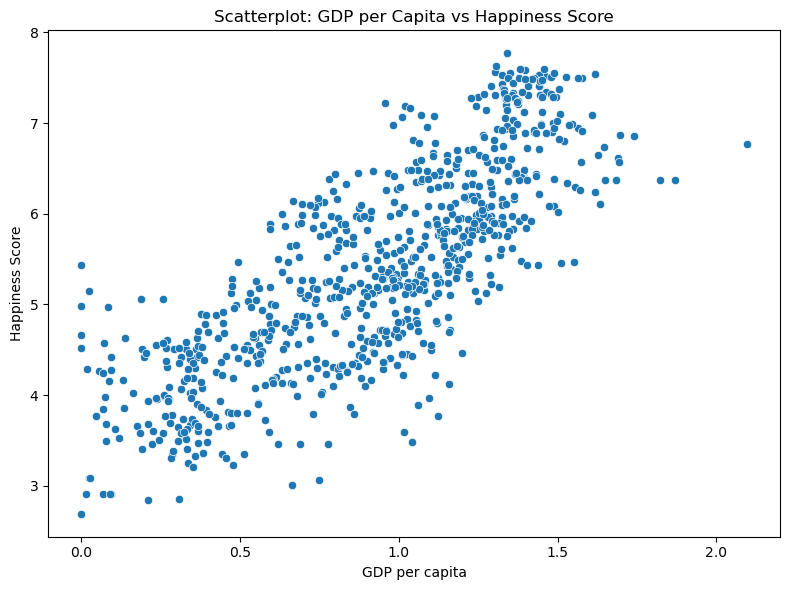

In [51]:
# Scatterplot to explore relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP per capita', y='Score')
plt.title('Scatterplot: GDP per Capita vs Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

### Task 5:

#### **Hypothesis:** Countries with higher GDP per capita will have significantly higher happiness scores.

#### **Rationale:** Economic prosperity enables better living standards, healthcare, and services that support well-being.


### Task 6. Reshape Variables into NumPy Arrays

In [33]:
# DReshape the variables into NumPy arrays and put them into separate objects.

X = df_filtered[['GDP per capita']].values.reshape(-1,1)  # Independent variable
y = df_filtered['Score'].values.reshape(-1,1)             # Dependent variable

In [35]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [37]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

### Task 7. Split the Data into Training and Test Sets

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Task  8. Run Linear Regression on the Data

In [45]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [47]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Task  9. Create a Plot Showing Regression Line

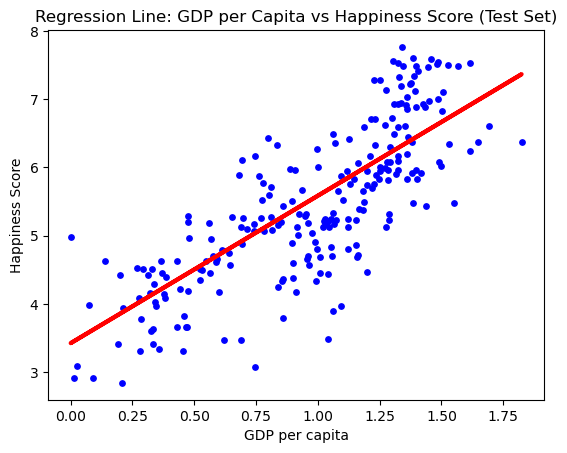

In [57]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regression Line: GDP per Capita vs Happiness Score (Test Set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

### **Task  10. Interpretation in Markdown**

#### The regression line shows a clear upward trend, indicating that as GDP per capita increases, happiness scores also tend to increase. The fit is reasonably good, with some deviation around the line, suggesting GDP per capita is an important but not exclusive predictor.


### Task  11. Checking the Model Performance (MSE & R²)

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


In [73]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

### Task  12. Compare Predicted vs Actual Values

In [81]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


### **Task  13. Thoughts on Model Performance**

### The model performs fairly well, with an R²  (coefficient of determination) of approximately 0.62, indicating GDP per capita explains about 62% of the variance in happiness scores, leaving 38% unexplained. However, it doesn't capture all influencing factors. The remaining 38% variance could be due to omitted variables like social support, life expectancy, freedom, or cultural differences. Future models should include more predictors to improve accuracy.
